In [1]:
import sys
sys.path.append('../../code')
import os
import qPCR_analysis_functions as qf
import math
%matplotlib inline
resdflist=[]
ampdflist=[]
fnamelist=[]
platename='NA'
flist=os.listdir('..')
flist.sort()
for i in range(len(flist)):
    if(flist[i].endswith('.eds')):
        fnamelist.append(flist[i])
        resdf,ampdf,header=qf.getEDSData('../'+flist[i])
        if(platename=='NA'): platename=header['Description']
        if(platename=='NA'): platename=header['Comment']
        if(platename=='NA'): platename=header['Barcode']
        if(platename=='NA'): platename=header['Name']
        resdflist.append(resdf)
        ampdflist.append(ampdf)
uampdf=ampdflist[0]
resdf=resdflist[0]
print('plate name = '+platename)
resdflist[0].head()

(210, 44)
plate name = PER123RHV


,Well,Well Position,Sample,Target,Task,Cq,Avg Cq,Cq SD,Delta Cq,Qty,Avg Qty
0,0,A1,CDXLGGRVY,N1,Target,32.8372,32.8372,,,,
1,1,A2,CDXLGGRVY,N2,Target,31.96128,31.96128,,,,
2,2,A3,CDXLGGRVY,RP,Target,25.288528,25.288528,,,,
3,3,A4,CBHNCBNSY,N1,Target,9.886335,9.886335,,,,
4,4,A5,CBHNCBNSY,N2,Target,18.730738,18.730738,,,,


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#now we can make our heatmap
uampdf['Cycle Number']=range(1,(len(uampdf)+1))
qf.transformResDF(resdf)
resdf.head()

,Well,Well Position,Sample,Target,Task,Cq,Avg Cq,Cq SD,Delta Cq,Qty,Avg Qty,row,col,rowlett
0,0,A1,CDXLGGRVY,N1,Target,32.837200,32.8372,,,,,1,1,A
1,1,A2,CDXLGGRVY,N2,Target,31.961280,31.96128,,,,,1,2,A
2,2,A3,CDXLGGRVY,RP,Target,25.288528,25.288528,,,,,1,3,A
3,3,A4,CBHNCBNSY,N1,Target,9.886335,9.886335,,,,,1,4,A
4,4,A5,CBHNCBNSY,N2,Target,18.730738,18.730738,,,,,1,5,A


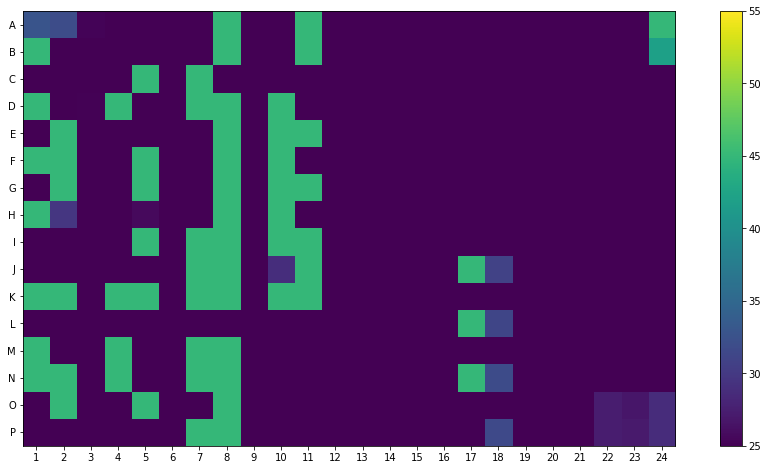

In [4]:
qf.makeHeatMap(resdf,'Cq')

In [5]:
#now lets make a big plot matrix with all of the amplification curves
#first need to make an array where rows are cycle and columns are deltaRn
mincycle=min(ampdf['Cycle Number'])
maxcycle=max(ampdf['Cycle Number'])
minamp=0.0
maxamp=0.0
for column in uampdf.columns:
    if(column!='Cycle Number'):
        minamp=min(minamp,min(uampdf[column]))
        maxamp=max(maxamp,max(uampdf[column]))
print([mincycle,maxcycle,minamp,maxamp])

[1, 44, -0.028521834, 2.4565501]


In [6]:
uampdf.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P16,P17,P18,P22,P23,P24,Cycle Number
0,0.021858,0.014455,0.011372,-0.010070,0.006188,0.019794,-0.008820,0.047400,0.012986,-0.001291,...,0.003656,0.013613,0.017266,0.001235,0.001556,0.001697,0.013966,0.014160,0.008280,1
1,0.019845,0.013897,0.011211,-0.006435,0.005708,0.017275,-0.004856,0.041335,0.010360,-0.000039,...,0.001246,0.011602,0.013851,0.000579,0.000576,-0.002605,0.011065,0.010011,0.004104,2
2,0.022308,0.014238,0.008758,-0.000537,0.004204,0.011937,-0.000224,0.032275,0.007218,-0.001442,...,-0.000806,0.007893,0.009594,0.000651,-0.000393,-0.007787,0.008194,0.006353,-0.001799,3
3,0.014515,0.008165,0.005209,0.000964,0.001755,0.006918,-0.000075,0.019607,0.003688,0.001483,...,-0.002949,0.003834,0.005573,-0.000651,-0.000269,-0.009050,0.001086,0.000682,-0.003963,4
4,0.006118,0.004875,0.002143,-0.000318,-0.002748,0.003786,0.000823,0.008648,0.000307,0.001359,...,-0.006517,-0.001434,-0.000117,0.000708,0.000662,-0.004308,-0.009803,-0.003145,-0.005781,5


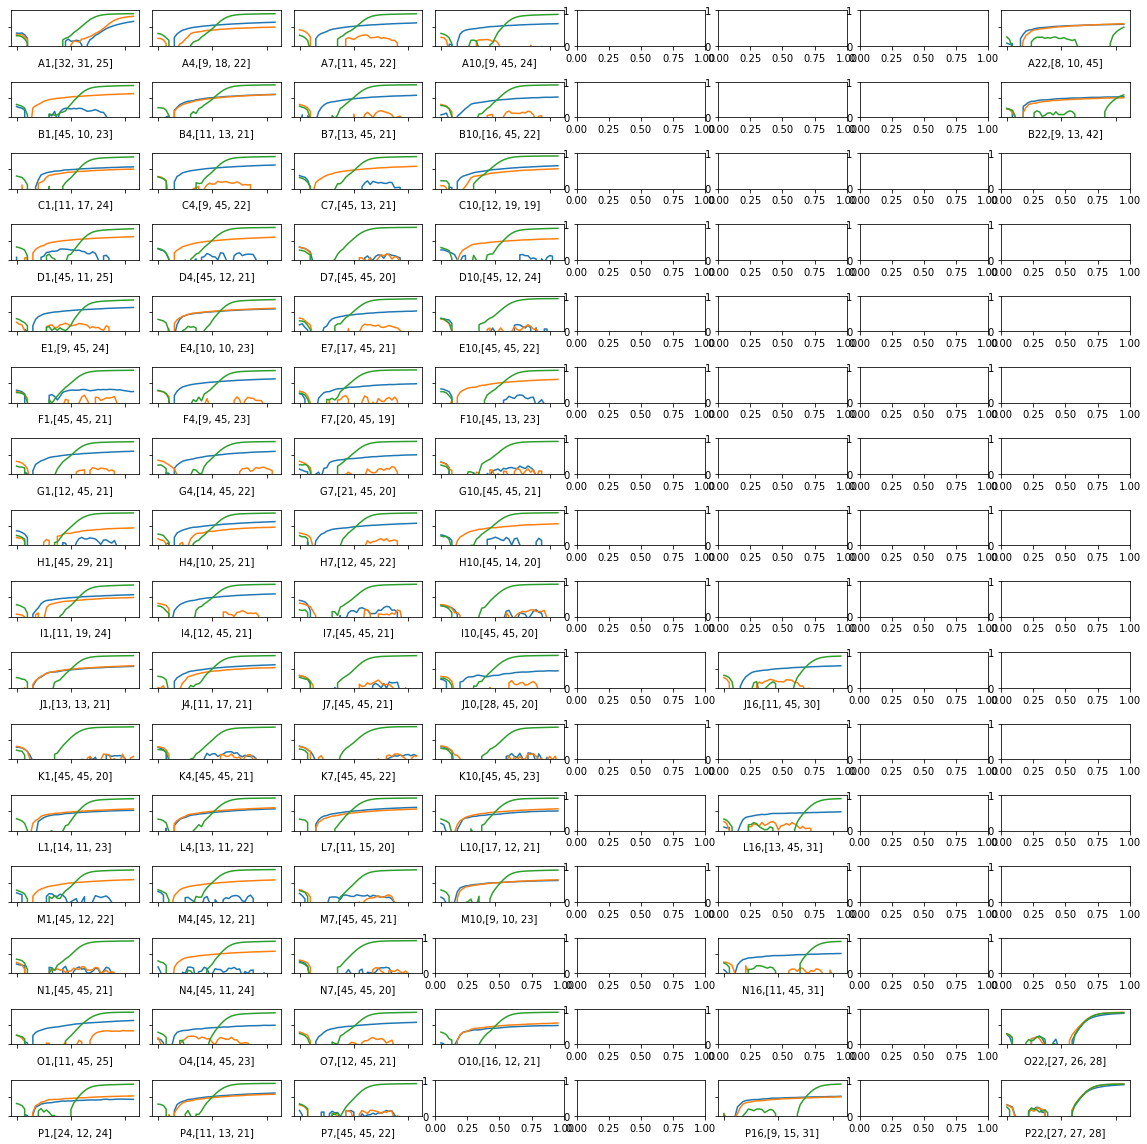

In [7]:
#now make the big matplotlib composite
qf.getPlotGrid(resdf,uampdf,maxamp,True)

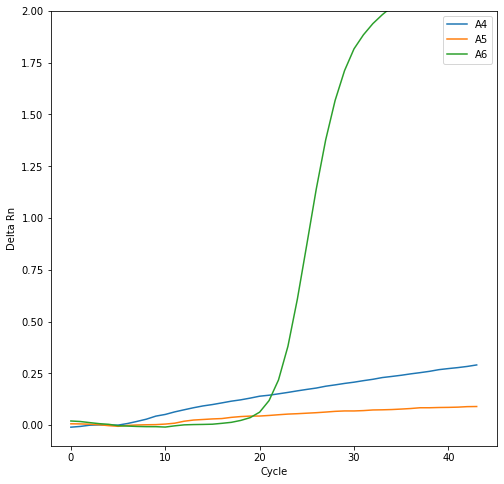

In [8]:
#select out triples to plot
qf.getTriplePlot('A4',uampdf,2.0)

In [9]:
outresdf,uampdf=qf.fitDF(uampdf,resdf)

A1,7.369521502195095e-05,[-4.66724903e-04  4.39550322e-01  3.88384518e+01  3.17849448e-01]
A2,0.00013225261915331124,[-1.11040135e-03  1.24967333e+00  3.72472558e+01  4.93561879e-01]
A3,0.0006885214393439587,[-6.13592616e-03  2.19658925e+00  2.92562717e+01  4.95173472e-01]
A4,0.003539727635325482,[-0.01967769  0.39401274 18.75834125  0.1       ]
A5,2.7139035207109715e-05,[-6.73863457e-03  9.92718671e-02  1.92798608e+01  1.38528472e-01]
A6,0.0017578653567529648,[-1.07647689e-02  2.13395679e+00  2.59033109e+01  4.76234004e-01]
A7,0.0012560818869657283,[-1.71060499e-02  3.28002255e-01  2.10903727e+01  1.00000000e-01]
A8,0.025781386444763084,[-3.26856249e-03 -1.63428124e-01  5.00000000e+00  7.17426523e-01]
A9,0.0019236416352919144,[-9.94764089e-03  2.07624180e+00  2.61702463e+01  4.63912790e-01]
A10,0.0016168522692992418,[-1.42450782e-02  2.68899856e-01  1.64543566e+01  1.00000000e-01]
A11,3.476062752502677e-05,[-1.79840368e-04 -8.99201840e-03  2.73601897e+01  3.61369954e-01]
A12,0.0026345

H8,0.005265498511847886,[-1.49959016e-03 -7.49795079e-02  5.00000000e+00  3.89998664e-01]
H9,0.0019496506910333835,[-1.17765631e-02  2.14334528e+00  2.62098509e+01  4.72083462e-01]
H10,0.00016094791574609364,[-1.02042142e-03 -5.10210708e-02  3.97005288e+01  6.13093108e-01]
H11,0.00017534970307979235,[-1.17422508e-02  2.13022138e-01  2.28029290e+01  1.00466982e-01]
H12,0.0012946846223381404,[-1.01489976e-02  2.29055975e+00  2.48139574e+01  4.65932681e-01]
I1,0.0010761298570816807,[-1.29438348e-02  2.38200304e-01  1.78204684e+01  1.00000000e-01]
I2,3.247119600087954e-05,[-7.01404534e-03  1.08229443e-01  2.08639839e+01  1.28032789e-01]
I3,0.0026578878389182615,[-1.36754667e-02  1.78018076e+00  2.77441707e+01  4.37929700e-01]
I4,0.0003195889316421515,[-1.56930194e-02  2.81405495e-01  2.22883681e+01  1.01978069e-01]
I5,0.00911069628845258,[-1.97306113e-03 -9.86530564e-02  5.00000000e+00  4.03420184e-01]
I6,0.0018533798483209147,[-1.17639238e-02  2.13638990e+00  2.55328566e+01  4.60982674e-0

P4,0.0014726608301475041,[-1.55791950e-02  3.17782991e-01  2.14038752e+01  1.00000000e-01]
P5,0.0003234448105947806,[-1.2239488e-02  2.2341619e-01  2.1491271e+01  1.0000000e-01]
P6,0.00117320177908023,[-1.12227361e-02  2.27529676e+00  2.54460689e+01  4.82063331e-01]
P7,0.0001259967859054241,[-1.01898773e-03 -5.09493865e-02  4.00325163e+01  6.71362266e-01]
P8,0.00018776397678242577,[-1.12095024e-03 -5.60475118e-02  3.96925012e+01  6.59686565e-01]
P9,0.0014846985780553978,[-1.10068781e-02  2.10983607e+00  2.57084036e+01  4.87669712e-01]
P16,0.0003875895954512831,[-7.72932706e-03  1.26051724e-01  1.03405127e+01  1.22222395e-01]
P17,0.0005203106692814306,[-6.26663669e-03  1.21162848e-01  1.29177537e+01  1.00000000e-01]
P18,0.0002824043989379346,[-4.95344638e-03  1.95528015e+00  3.48220990e+01  5.64159454e-01]
P22,0.0011635665176385056,[-1.09833412e-02  1.67217061e+00  3.32675723e+01  3.73641124e-01]
P23,0.000555911323897441,[-7.23742191e-03  2.06036787e+00  3.24084958e+01  4.89463619e-01]


In [10]:
mincontrolamp=1.0
threshfrac=0.05
maxcontroljct=35.0
#parameter limits are jct, amp, and n (hill slope) value
paramslims=[[15,45],[0.1,10],[0.2,0.8]]
controlwells=['O22','P22']
qf.computeJCTValues(outresdf,mincontrolamp,threshfrac,maxcontroljct,controlwells,paramslims)

control 1 amps [1.71776835 2.14074393 1.96996137]
control 2 amps [1.67217061 2.06036787 1.93860222]
threshholds [0.08474847 0.1050278  0.09771409]
control 1 jct [25.40388409 26.1482691  26.68569306]
control 2 jct [25.42534415 26.84356654 26.70788987]


In [11]:
ctlim=40.0
combineddf=qf.categorizeResults(outresdf,ctlim,platename)

In [12]:
qf.outputCurves('../',fnamelist[0],uampdf,outresdf,combineddf)

PER123RHV_1_06242020_1


In [13]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

In [15]:
import time
#wait a bit to let saving finish
time.sleep(2)
#finally save this whole notebook to html
!jupyter nbconvert "analyze_qpcr_plate-384-v2.ipynb" --to html

[NbConvertApp] Converting notebook analyze_qpcr_plate-384-v2.ipynb to html
[NbConvertApp] Writing 693397 bytes to analyze_qpcr_plate-384-v2.html
